In [1]:
import matplotlib.pyplot as plt
from torchvision import datasets
from tqdm import tqdm

train_dataset = datasets.MNIST(root='data/',train=True,download=True,transform=None)
test_dataset = datasets.MNIST(root='data/',train=False,download=True,transform=None)

train_imgs = train_dataset.data.numpy()/255
train_imgs = train_imgs.reshape(train_imgs.shape[0],28*28)
train_labels = train_dataset.targets.numpy()

test_imgs = test_dataset.data.numpy()/255
test_imgs = test_imgs.reshape(test_imgs.shape[0],28*28)
test_labels = test_dataset.targets.numpy()

100%|██████████| 500/500 [02:07<00:00,  3.93it/s]

Testing accuracy:  0.9263


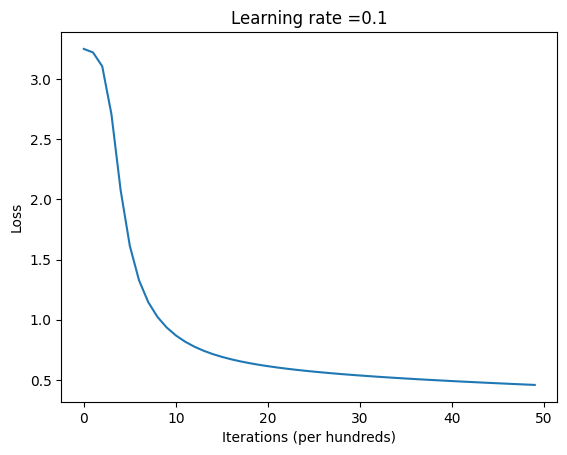

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义每层的大小
n_x = 784  # 输入层的大小
n_h = 100  # 隐藏层的大小
n_y = 10  # 输出层的大小

def initialize_parameters():
    """
    初始化神经网络的参数（权重和偏置）
    """
    np.random.seed(1)  # 设定随机数种子，确保结果可复现
    W1 = np.random.randn(n_h, n_x) * 0.01  # 输入层到隐藏层的权重
    b1 = np.zeros((n_h, 1))  # 输入层到隐藏层的偏置
    W2 = np.random.randn(n_y, n_h) * 0.01  # 隐藏层到输出层的权重
    b2 = np.zeros((n_y, 1))  # 隐藏层到输出层的偏置
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

def relu(Z):
    """
    ReLU激活函数
    """
    return np.maximum(0, Z)

def softmax(Z):
    """
    Softmax激活函数
    """
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # 防止指数爆炸
    return e_Z / np.sum(e_Z, axis=0, keepdims=True)

def forward_propagation(X, parameters):
    """
    前向传播
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1  # 输入层到隐藏层的线性转换
    A1 = relu(Z1)  # 输入层到隐藏层的激活
    Z2 = np.dot(W2, A1) + b2  # 隐藏层到输出层的线性转换
    A2 = softmax(Z2)  # 隐藏层到输出层的激活
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}  # 缓存一些值，用于后向传播
    return A2, cache

def compute_loss(A2, Y):
    """
    计算交叉熵损失
    """
    m = Y.shape[1]  # 样本数
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    loss = - np.sum(logprobs) / m
    return np.squeeze(loss)

def relu_derivative(Z):
    """
    ReLU激活函数的导数
    """
    return (Z > 0).astype(Z.dtype)

def backward_propagation(parameters, cache, X, Y):
    """
    后向传播
    """
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    dZ2 = A2 - Y  # 输出层的激活梯度
    dW2 = (1 / m) * np.dot(dZ2, A1.T)  # 输出层的权重梯度
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)  # 输出层的偏置梯度
    dZ1 = np.multiply(np.dot(W2.T, dZ2), relu_derivative(A1))  # 隐藏层的激活梯度
    dW1 = (1 / m) * np.dot(dZ1, X.T)  # 隐藏层的权重梯度
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)  # 隐藏层的偏置梯度
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}  # 保存梯度值
    return grads

def update_parameters(parameters, grads, learning_rate=0.1):
    """
    更新参数
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

def predict(parameters, X):
    """
    使用模型进行预测
    """
    A2, _ = forward_propagation(X, parameters)
    return np.argmax(A2, axis=0)  # 返回预测的标签

def one_hot(Y):
    """
    对标签进行one-hot编码
    """
    return np.eye(n_y)[Y].T

def model(X, Y, num_iterations=5000, learning_rate=0.1):
    """
    定义整个模型的训练过程
    """
    parameters = initialize_parameters()
    Y_one_hot = one_hot(Y)
    loss_history = []
    for i in tqdm(range(0, num_iterations)):
        A2, cache = forward_propagation(X, parameters)
        loss = compute_loss(A2, Y_one_hot)
        grads = backward_propagation(parameters, cache, X, Y_one_hot)
        parameters = update_parameters(parameters, grads, learning_rate)
        if i % 10 == 0:
            # print(f"Loss after iteration {i}: {loss}")
            loss_history.append(loss)
    return parameters, loss_history

# 加载数据和预处理
# ...

# 在训练数据上运行模型
parameters, loss_history = model(train_imgs.T, train_labels, num_iterations=500, learning_rate=0.2)

# 保存模型
np.savez("parameters.npz", **parameters)

# 在测试数据上进行预测
predictions = predict(parameters, test_imgs.T)

# 计算准确率
accuracy = (predictions == test_labels).mean()
print("Testing accuracy: ", accuracy)

# 绘制损失曲线
plt.plot(loss_history)
plt.ylabel('Loss')
plt.xlabel('Iterations (per hundreds)')
plt.title("Learning rate =" + str(0.1))
plt.show()


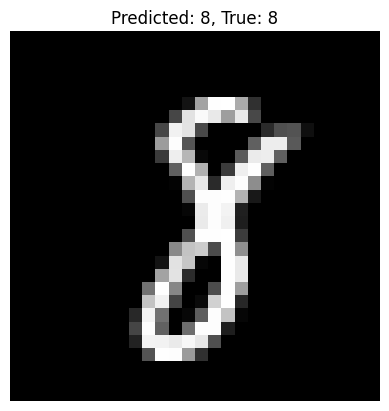

In [64]:
# 读取模型
parameters = np.load("parameters.npz")

# Pick a random image from the test set
index = np.random.randint(test_imgs.shape[0])
image = test_imgs[index]
label = test_labels[index]

# Predict the label of the image
prediction = predict(parameters, image.reshape(-1, 1))

# Show the image and the prediction
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {prediction[0]}, True: {label}")
plt.axis('off')
plt.show()